Required Libraries

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Load and Prepare the Data

In [191]:
df=pd.read_csv("Diabetics prediction.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [193]:
df.shape

(768, 9)

In [195]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [197]:
#Ensure that there are no missing values.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [199]:
# Check Duplication
df.duplicated().sum()

0

Visualization

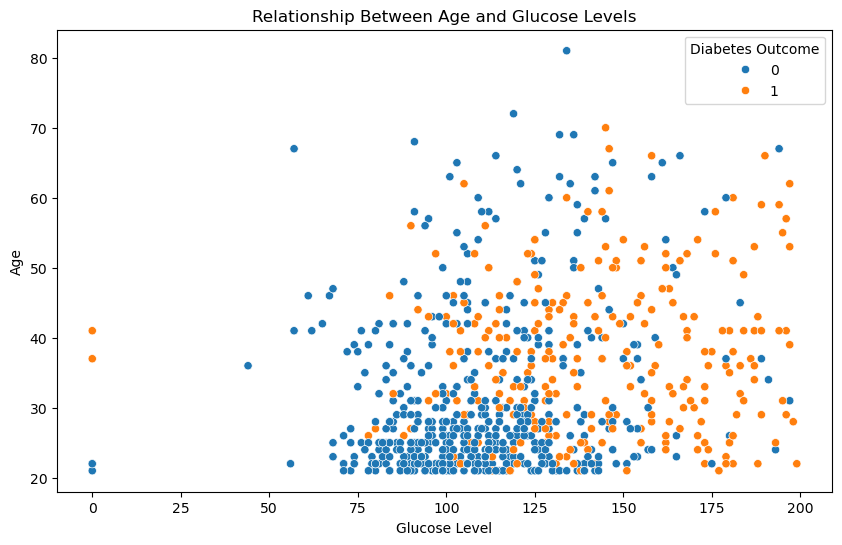

In [202]:
# Visualizing the relationship between Age and Glucose levels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Glucose', y='Age', hue='Outcome')
plt.title('Relationship Between Age and Glucose Levels')
plt.xlabel('Glucose Level')
plt.ylabel('Age')
plt.legend(title='Diabetes Outcome')
plt.show()

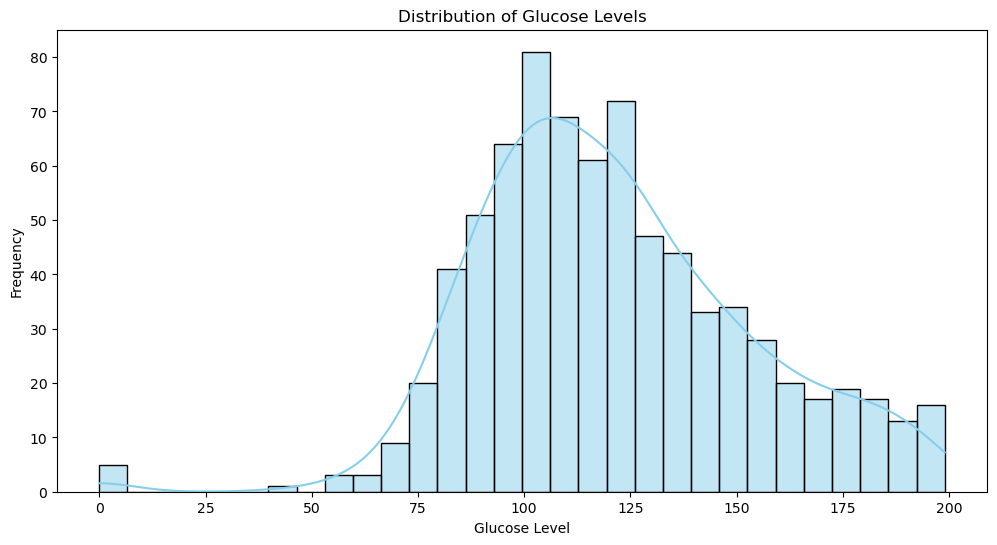

In [204]:
# Visualizing the distribution of Glucose
plt.figure(figsize=(12, 6))
sns.histplot(df['Glucose'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()

Train the Logistic Regression Model

In [256]:
# class LogisticRegression:
    
#     def __init__(self, l_rate=0.001, iterations=1000):
#         self.l_rate = l_rate
#         self.iterations = iterations

#     def fit(self, x, y):
#         self.losses = []
#         self.theta = np.zeros((1 + x.shape[1])) 
#         n = x.shape[0] 

#         for i in range(self.iterations):
#             #Step1
#             y_pred = self.theta[0] + np.dot(x, self.theta[1:])
#             z = y_pred
            
#             #Step2
#             g_z =  1 / (1 + np.e**(-z))      
            
#             #Step3
#             cost = (-y * np.log(g_z) - (1 - y) * np.log(1 - g_z))/ n
#             self.losses.append(cost)
            
#             #Step4
#             d_theta1 = (1/n) * np.dot(x.T, (g_z - y)) 
#             d_theta0 = (1/n) * np.sum(g_z - y) 
            
#             #Step5
#             self.theta[1:] = self.theta[1:] - self.l_rate * d_theta1  
#             self.theta[0] = self.theta[0] - self.l_rate * d_theta0      
#         return self
    
#     def predict(self, x):
#         y_pred = self.theta[0] + np.dot(x, self.theta[1:]) 
#         z = y_pred
#         g_z = 1 / (1 + np.e**(-z))
#         return [1 if i > 0.5 else 0 for i in g_z]  

# #features scaling using z-score
# def scale(x):
#     x_scaled = x - np.mean(x, axis=0)
#     x_scaled = x_scaled / np.std(x_scaled, axis=0)
#     return x_scaled


# x_sd= scale(x)  
# model = LogisticRegression()
# model.fit(x_sd, y)

# y_pred = model.predict(x_sd)

In [254]:
# Splitting the dataset
x=df[['Age', 'Glucose']]
y=df["Outcome"]
print(x.shape)
print(y.shape)

(768, 2)
(768,)


In [292]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [294]:
# Add polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [296]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)


In [298]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Evaluate the Model

In [301]:
# Predict outcomes on the test set
y_pred = model.predict(X_test)

In [303]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


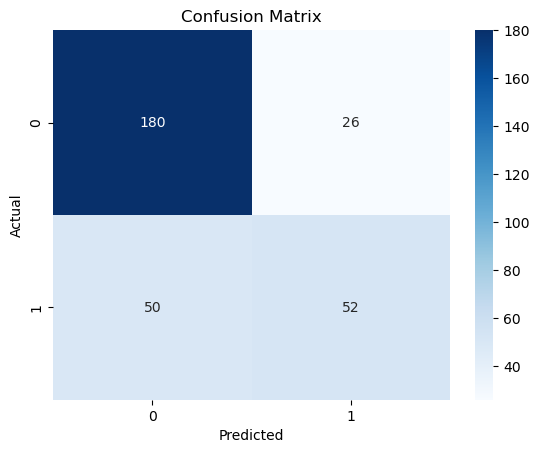

In [305]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()